# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Step 1: Reading and Understanding the Data

In [487]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [488]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [489]:
day.shape

(731, 16)

In [490]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [491]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [492]:
#check Null values
day.isnull().values.any()

False

# Step 2: Visualising the Data

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns

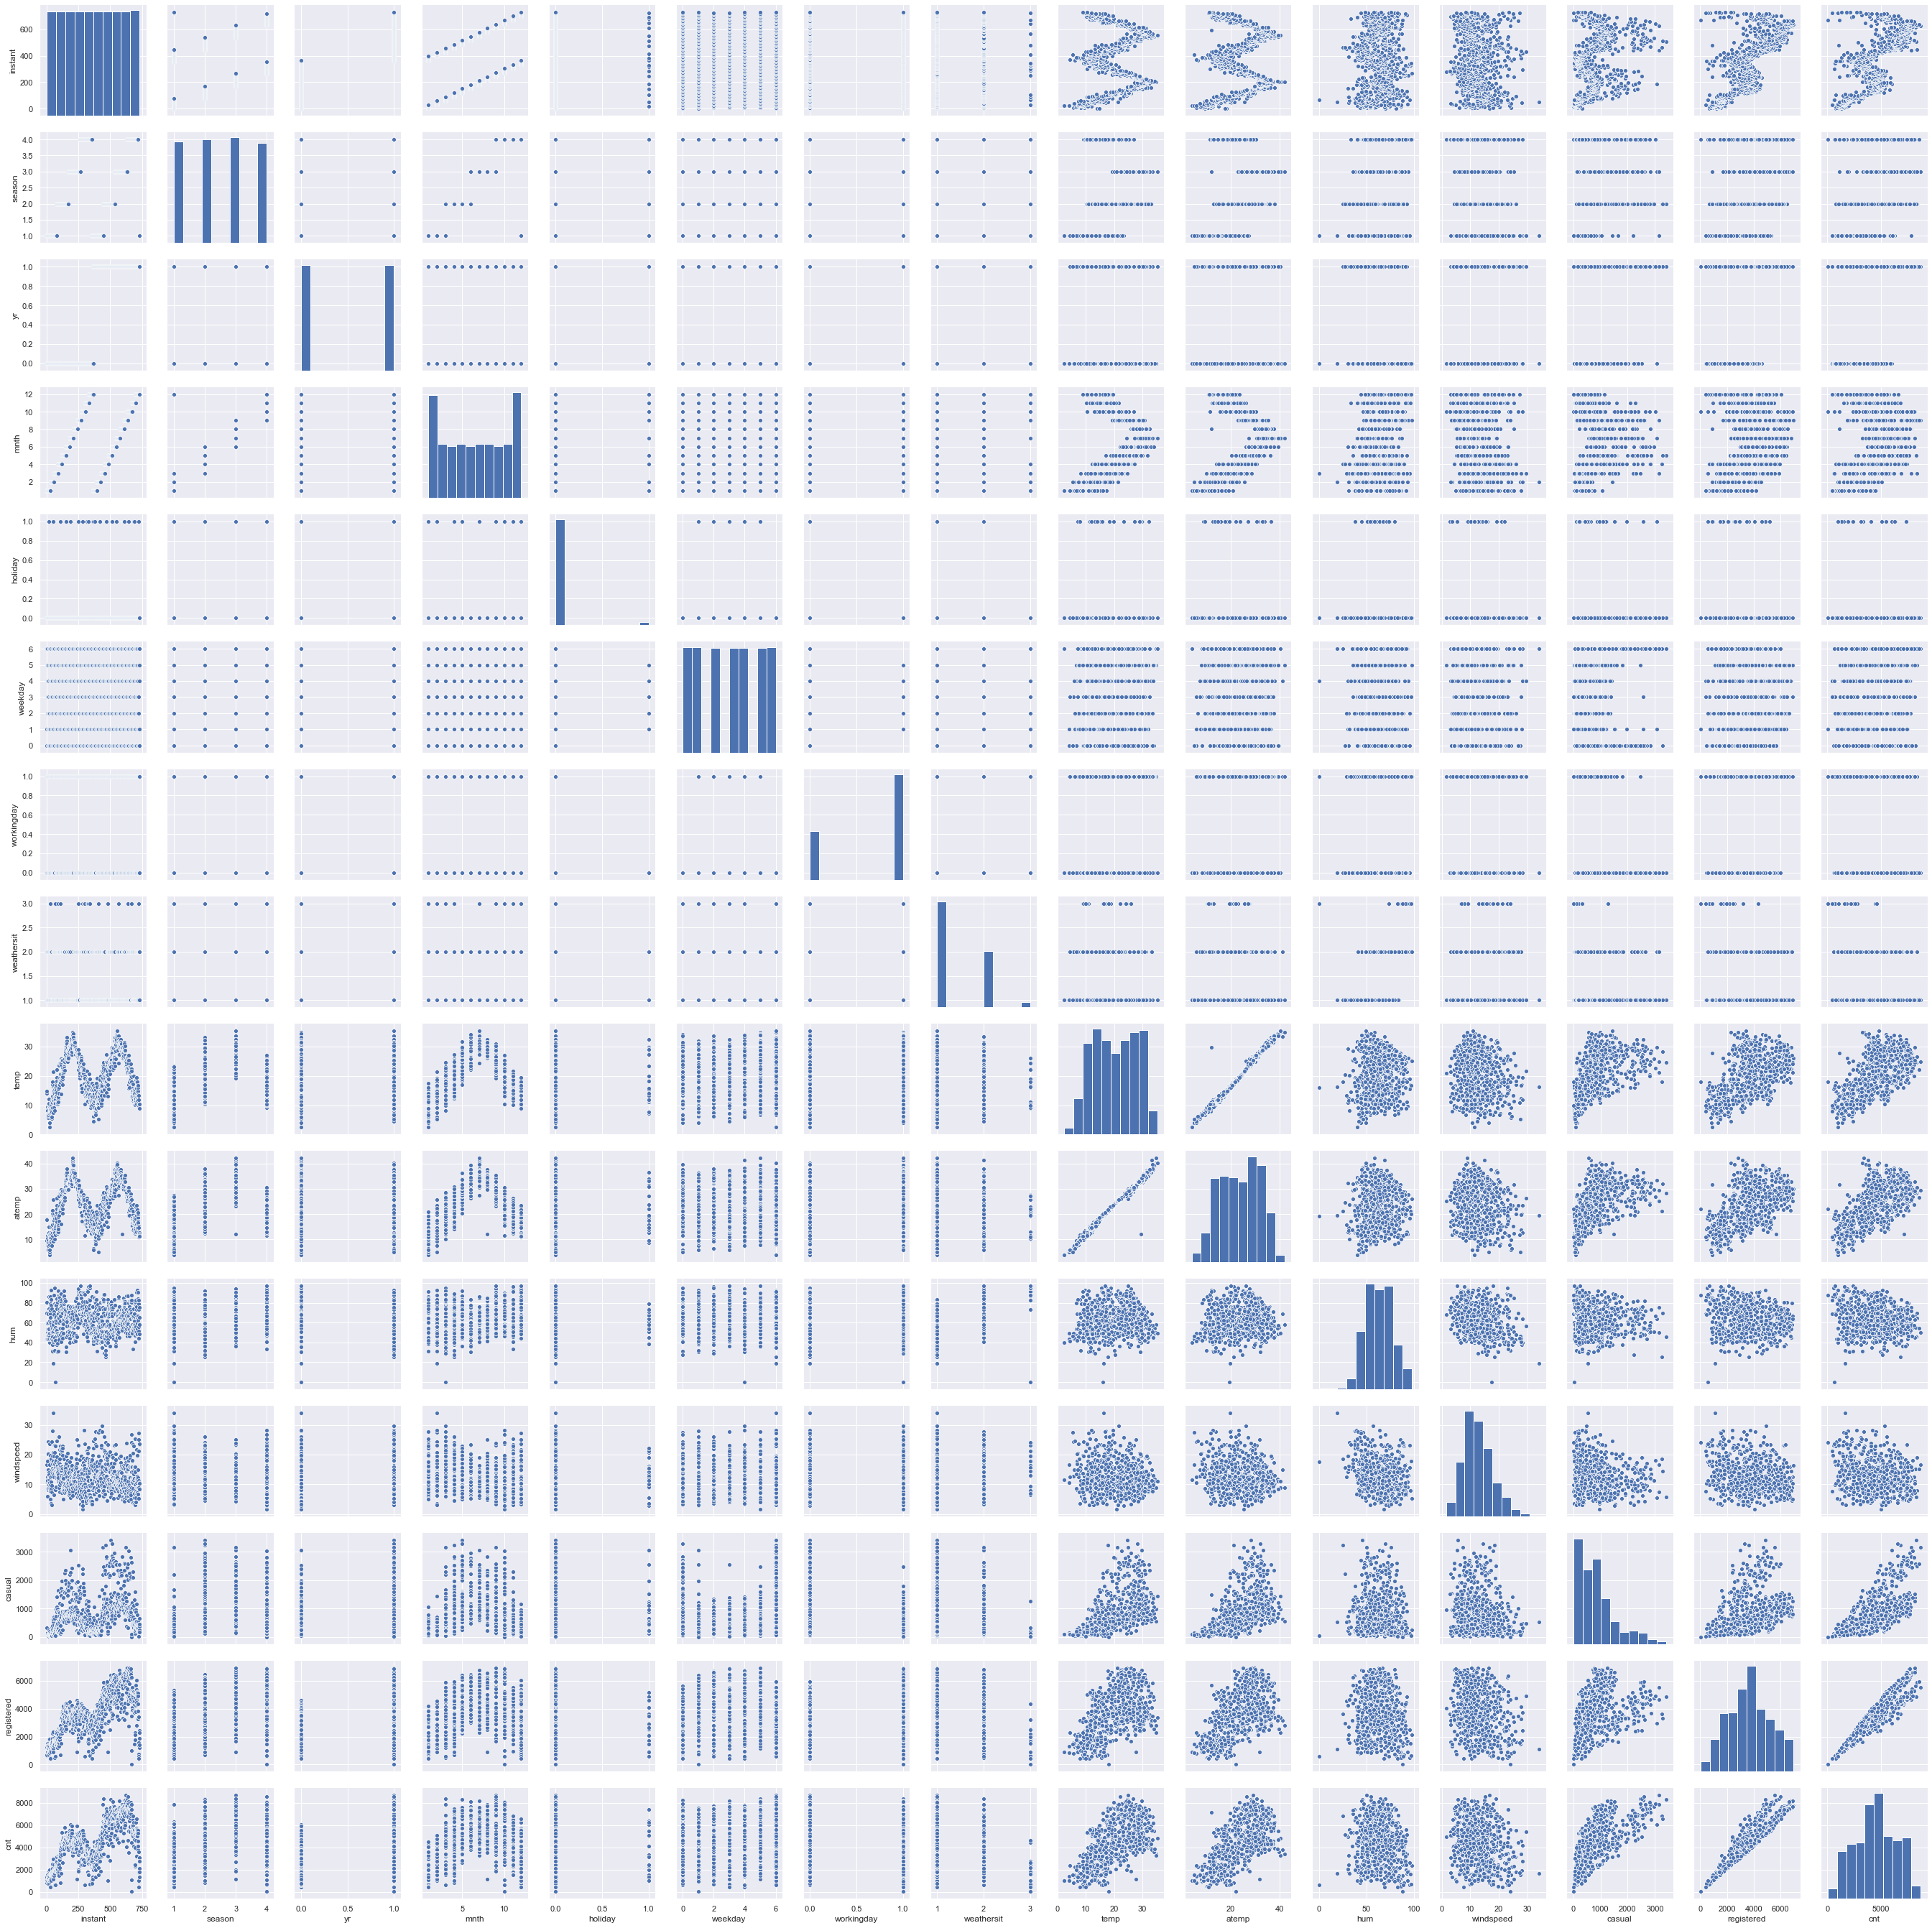

In [494]:
sns.pairplot(day)
plt.show()

## This plot will visualize numerical varaibles

### Visualising Continous Variables

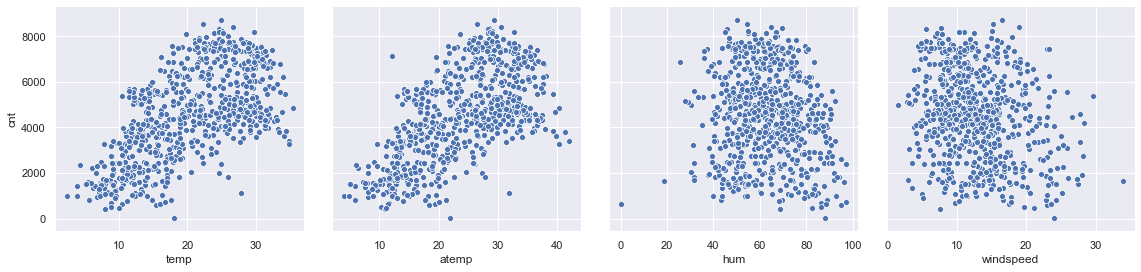

In [495]:
sns.pairplot(day, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

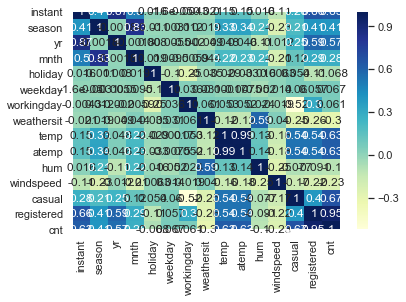

In [496]:
sns.heatmap(day.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Visualising Categorical Variables

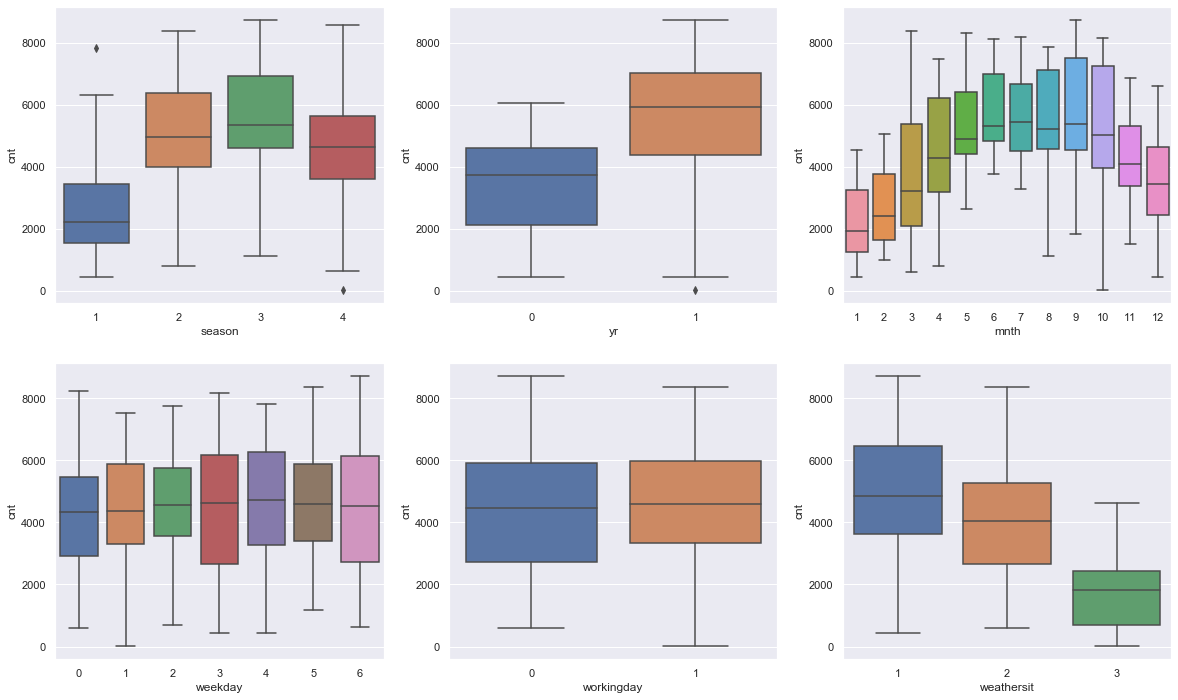

In [497]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

### Step 3: Data Preparation

In [498]:
# removing useless feature
day = day.drop(['casual' , 'registered','instant','dteday'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


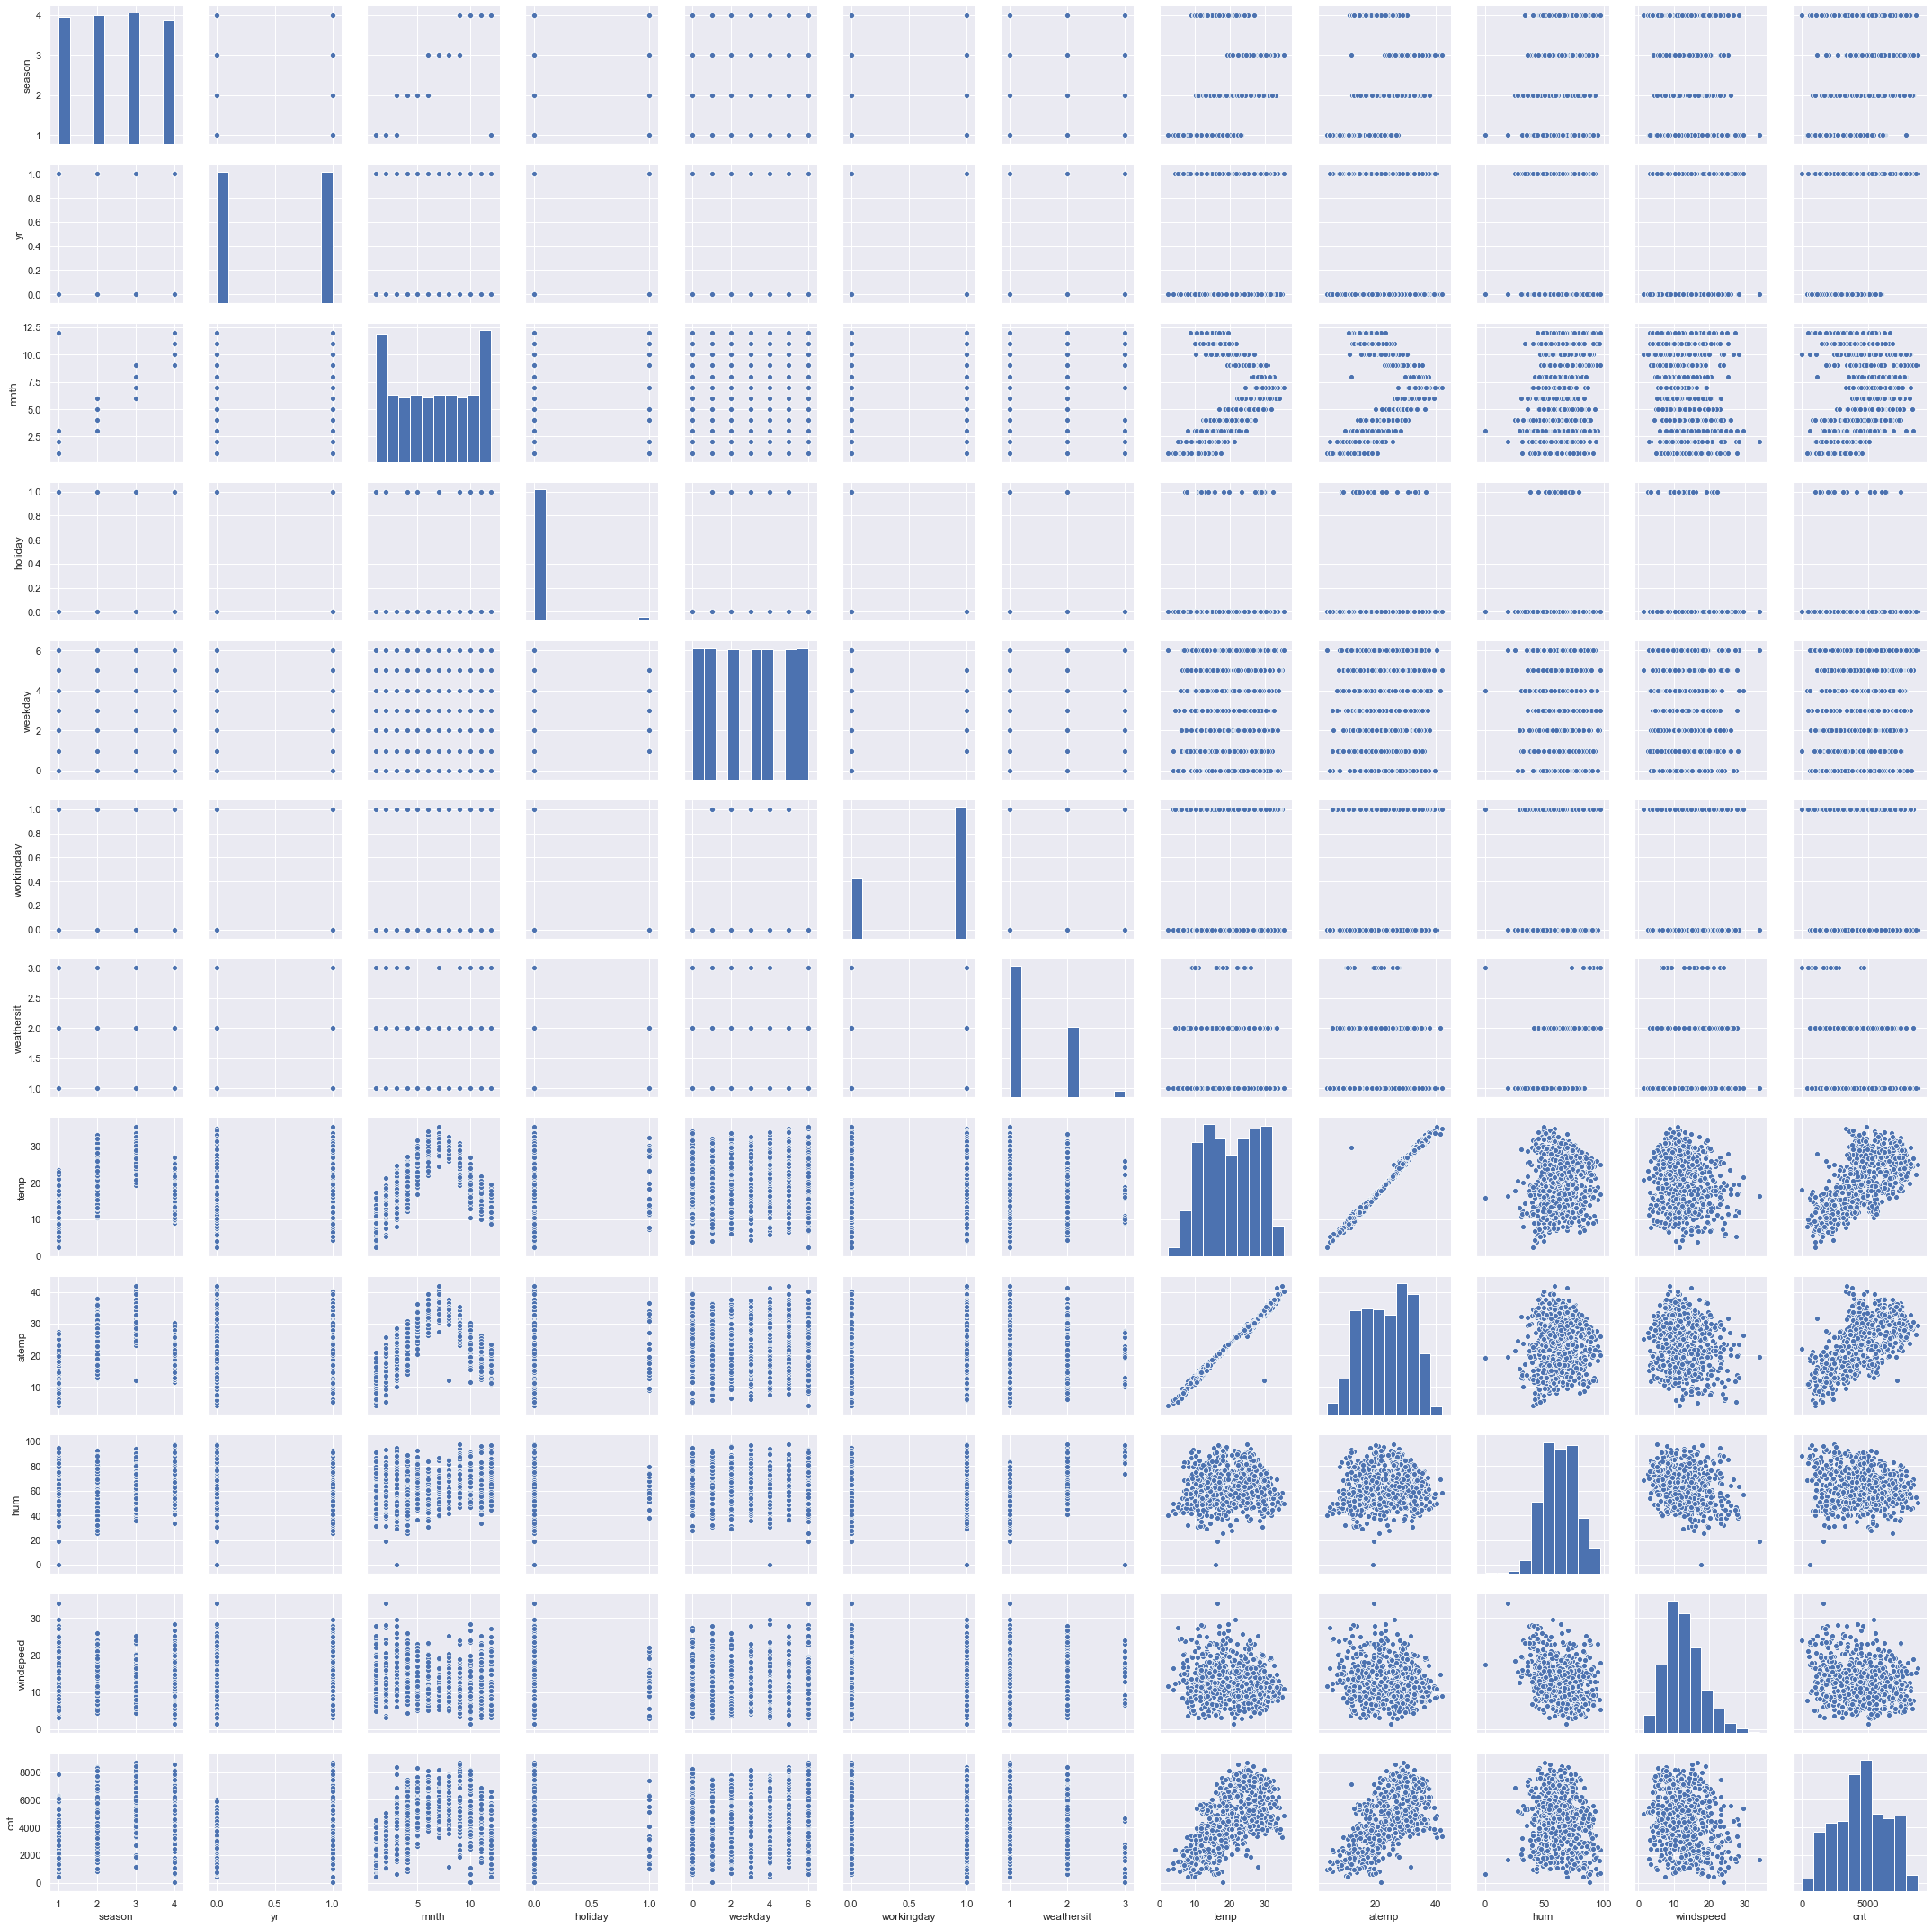

In [499]:
sns.pairplot(day)
plt.show()

In [500]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


### Dummy Variables

In [501]:

day.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [502]:
df_1 = pd.get_dummies(day['weekday'], prefix='weekday', drop_first=True)
df_1

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
726,0,0,0,1,0,0
727,0,0,0,0,1,0
728,0,0,0,0,0,1
729,0,0,0,0,0,0


In [503]:
day = pd.concat([day, df_1], axis = 1)
day.head()

# All weekdays 0 means 'Sunday'
# Weekday_1 is 1 and weekday is 1 then 'Monday'
# Weekday_6 is 1 and weekday is 6 then 'Saturday'
#lllrly for others

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0


In [504]:
df_2 = pd.get_dummies(day['season'], prefix='season', drop_first=True)
df_2.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [505]:
day = pd.concat([day, df_2], axis = 1)
day.head()

# Season = 1 and all seasons = 0 then 'spring'
# Season = 2 and all season_2 = 1 then 'summer'
# Season = 3 and all season_3 = 1 then 'fall'
# Season = 4 and all season_4 = 1 then 'winter'


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,985,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,801,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,1349,1,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1562,0,1,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,1600,0,0,1,0,0,0,0,0,0


In [506]:
df_3 = pd.get_dummies(day['weathersit'], prefix='weathersit', drop_first=True)
df_3.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [507]:
day = pd.concat([day, df_3], axis = 1)
day.head()

# weathersit = 1 and weathersit_2 and weathersit_3 = 0 'Clear, Few clouds, Partly cloudy, Partly cloudy'
# weathersit = 2 and weathersit_2 = 1 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
# weathersit = 3 and weathersit_3 = 1 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,0


In [508]:
df_4 = pd.get_dummies(day['mnth'], prefix='mnth', drop_first=True)
df_4.tail()

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1
729,0,0,0,0,0,0,0,0,0,0,1
730,0,0,0,0,0,0,0,0,0,0,1


In [509]:
day = pd.concat([day, df_4], axis = 1)
day.tail()

# mnth = 1 and rest all mnth 0 then 'january'
# mnth = 12 and rest all mnth_12= 1 then 'December'

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,0,0,0,0,0,0,0,0,1
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,0,1
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,0,0,0,0,0,0,0,0,1
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,0,0,0,0,0,0,0,0,1
730,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,...,0,0,0,0,0,0,0,0,0,1


In [510]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 34 columns):
season          731 non-null int64
yr              731 non-null int64
mnth            731 non-null int64
holiday         731 non-null int64
weekday         731 non-null int64
workingday      731 non-null int64
weathersit      731 non-null int64
temp            731 non-null float64
atemp           731 non-null float64
hum             731 non-null float64
windspeed       731 non-null float64
cnt             731 non-null int64
weekday_1       731 non-null uint8
weekday_2       731 non-null uint8
weekday_3       731 non-null uint8
weekday_4       731 non-null uint8
weekday_5       731 non-null uint8
weekday_6       731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
weathersit_2    731 non-null uint8
weathersit_3    731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4      

In [511]:
day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

### so by seeing the result we can conclude cnt - ranges between min of 22 and max of 8714 which means that each hour has seen a minimum of 22 bike rental to max of 8714 bike rentals that good right 

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

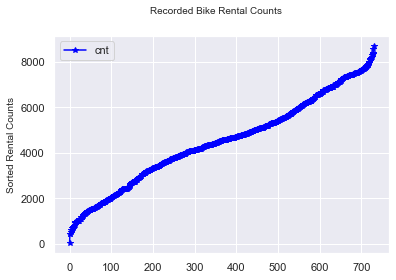

In [512]:
fig, ax = plt.subplots(1)
ax.plot(sorted(day['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

### Splitting the Data into Training and Testing Sets

In [513]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
576,3,1,7,0,1,1,1,29.964153,34.24935,66.8750,...,0,0,0,0,1,0,0,0,0,0
426,1,1,3,0,5,1,2,14.486653,17.99210,65.7083,...,1,0,0,0,0,0,0,0,0,0
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,0,0,0,0,0,0,0,0,1
482,2,1,4,0,5,1,1,18.757500,22.63185,40.0833,...,0,1,0,0,0,0,0,0,0,0
111,2,0,4,0,5,1,2,13.803347,16.09770,72.9583,...,0,1,0,0,0,0,0,0,0,0


In [514]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 576 to 520
Data columns (total 34 columns):
season          511 non-null int64
yr              511 non-null int64
mnth            511 non-null int64
holiday         511 non-null int64
weekday         511 non-null int64
workingday      511 non-null int64
weathersit      511 non-null int64
temp            511 non-null float64
atemp           511 non-null float64
hum             511 non-null float64
windspeed       511 non-null float64
cnt             511 non-null int64
weekday_1       511 non-null uint8
weekday_2       511 non-null uint8
weekday_3       511 non-null uint8
weekday_4       511 non-null uint8
weekday_5       511 non-null uint8
weekday_6       511 non-null uint8
season_2        511 non-null uint8
season_3        511 non-null uint8
season_4        511 non-null uint8
weathersit_2    511 non-null uint8
weathersit_3    511 non-null uint8
mnth_2          511 non-null uint8
mnth_3          511 non-null uint8
mnth_4    

In [515]:
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
184,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,...,0,0,0,0,1,0,0,0,0,0
535,2,1,6,0,2,1,1,28.221653,32.73460,69.0000,...,0,0,0,1,0,0,0,0,0,0
299,4,0,10,0,4,1,2,19.270000,22.85230,81.2917,...,0,0,0,0,0,0,0,1,0,0
221,3,0,8,0,3,1,1,31.433347,34.24915,42.4167,...,0,0,0,0,0,1,0,0,0,0
152,2,0,6,0,4,1,1,29.315000,32.19710,30.5000,...,0,0,0,1,0,0,0,0,0,0


### Rescaling the Features

In [516]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [517]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
576,3,1,7,0,1,1,1,0.836974,0.795348,0.689137,...,0,0,0,0,1,0,0,0,0,0
426,1,1,3,0,5,1,2,0.366591,0.368552,0.677114,...,1,0,0,0,0,0,0,0,0,0
729,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,...,0,0,0,0,0,0,0,0,0,1
482,2,1,4,0,5,1,1,0.496388,0.490358,0.413052,...,0,1,0,0,0,0,0,0,0,0
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,...,0,1,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [518]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
576,3,1,7,0,1,1,1,0.836974,0.795348,0.689137,...,0,0,0,0,1,0,0,0,0,0
426,1,1,3,0,5,1,2,0.366591,0.368552,0.677114,...,1,0,0,0,0,0,0,0,0,0
729,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,...,0,0,0,0,0,0,0,0,0,1
482,2,1,4,0,5,1,1,0.496388,0.490358,0.413052,...,0,1,0,0,0,0,0,0,0,0
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,3,1,8,0,3,1,1,0.820361,0.772142,0.698153,...,0,0,0,0,0,1,0,0,0,0
53,1,0,2,0,3,1,1,0.202618,0.218747,0.435939,...,0,0,0,0,0,0,0,0,0,0
350,4,0,12,0,6,0,2,0.248216,0.223544,0.577930,...,0,0,0,0,0,0,0,0,0,1
79,2,0,3,0,1,1,2,0.462664,0.434043,0.759870,...,1,0,0,0,0,0,0,0,0,0


### Building our model

### RFE Recursive feature elimination

In [519]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [520]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [521]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 14),
 ('holiday', False, 13),
 ('weekday', False, 16),
 ('workingday', False, 4),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 18),
 ('weekday_3', False, 19),
 ('weekday_4', False, 17),
 ('weekday_5', False, 15),
 ('weekday_6', False, 3),
 ('season_2', False, 5),
 ('season_3', True, 1),
 ('season_4', False, 8),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 10)]

In [522]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'weathersit', 'temp', 'hum', 'windspeed', 'season_3',
       'weathersit_3', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10'],
      dtype='object')

In [523]:
X_train.columns[~rfe.support_]

Index(['mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'season_2', 'season_4', 'weathersit_2', 'mnth_2', 'mnth_7', 'mnth_11',
       'mnth_12'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [524]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,season,yr,weathersit,temp,hum,windspeed,season_3,weathersit_3,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10
576,3,1,1,0.836974,0.689137,0.239301,1,0,0,0,0,0,0,0,0
426,1,1,2,0.366591,0.677114,0.220569,0,0,1,0,0,0,0,0,0
729,1,1,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,2,1,1,0.496388,0.413052,0.656397,0,0,0,1,0,0,0,0,0
111,2,0,2,0.345824,0.751824,0.380981,0,0,0,1,0,0,0,0,0


In [525]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,season,yr,weathersit,temp,hum,windspeed,season_3,weathersit_3,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10
576,1.0,3,1,1,0.836974,0.689137,0.239301,1,0,0,0,0,0,0,0,0
426,1.0,1,1,2,0.366591,0.677114,0.220569,0,0,1,0,0,0,0,0,0
729,1.0,1,1,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,2,1,1,0.496388,0.413052,0.656397,0,0,0,1,0,0,0,0,0
111,1.0,2,0,2,0.345824,0.751824,0.380981,0,0,0,1,0,0,0,0,0


In [526]:

X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 576 to 520
Data columns (total 16 columns):
const           511 non-null float64
season          511 non-null int64
yr              511 non-null int64
weathersit      511 non-null int64
temp            511 non-null float64
hum             511 non-null float64
windspeed       511 non-null float64
season_3        511 non-null uint8
weathersit_3    511 non-null uint8
mnth_3          511 non-null uint8
mnth_4          511 non-null uint8
mnth_5          511 non-null uint8
mnth_6          511 non-null uint8
mnth_8          511 non-null uint8
mnth_9          511 non-null uint8
mnth_10         511 non-null uint8
dtypes: float64(4), int64(3), uint8(9)
memory usage: 36.4 KB


In [527]:
lr_1 = sm.OLS(y_train,X_train_rfe.astype(float)).fit()  # Running the linear model
lr_1

In [528]:
#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.76e-191
Time:                        23:02:09   Log-Likelihood:                 518.52
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -937.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2334      0.027      8.794   

In [529]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.31
7,season_3,4.37
4,temp,4.22
3,weathersit,2.06
5,hum,1.94
11,mnth_5,1.82
1,season,1.81
13,mnth_8,1.77
12,mnth_6,1.64
15,mnth_10,1.50


### Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values 
. Such variables are insignificant and should be dropped.

In [530]:
X = X.drop('const', 1)

In [531]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [532]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.76e-191
Time:                        23:02:10   Log-Likelihood:                 518.52
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -937.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2334      0.027      8.794   

In [533]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.24
3,temp,26.67
2,weathersit,15.70
0,season,9.92
6,season_3,5.88
5,windspeed,4.11
1,yr,2.07
10,mnth_5,1.97
12,mnth_8,1.95
11,mnth_6,1.77


In [534]:
### Dropping humidity as high VIF

In [535]:
X = X.drop('hum', 1)

In [536]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [537]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.44e-187
Time:                        23:02:10   Log-Likelihood:                 506.44
No. Observations:                 511   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1620      0.023      7.141   

In [538]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,22.11
0,season,9.18
2,weathersit,7.14
5,season_3,5.46
4,windspeed,4.10
1,yr,2.07
9,mnth_5,1.96
11,mnth_8,1.95
10,mnth_6,1.72
13,mnth_10,1.57


In [539]:
## Dropping of temp as VIF value is high

In [540]:
X = X.drop('temp', 1)

In [541]:
# Build a Fourth fitted model
_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [542]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.44e-187
Time:                        23:02:11   Log-Likelihood:                 506.44
No. Observations:                 511   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1620      0.023      7.141   

In [543]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weathersit,6.80
0,season,6.23
3,windspeed,3.96
4,season_3,2.86
1,yr,1.98
10,mnth_8,1.93
12,mnth_10,1.53
11,mnth_9,1.52
6,mnth_3,1.31
5,weathersit_3,1.26


In [544]:
## Dopping weathersit as high VIF value

In [545]:
X = X.drop('weathersit', 1)

In [546]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [547]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.12e-149
Time:                        23:02:11   Log-Likelihood:                 410.93
No. Observations:                 511   AIC:                            -795.9
Df Residuals:                     498   BIC:                            -740.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1448      0.020      7.174   

In [548]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,4.56
2,windspeed,3.31
3,season_3,2.85
1,yr,1.95
9,mnth_8,1.91
11,mnth_10,1.52
10,mnth_9,1.50
5,mnth_3,1.24
6,mnth_4,1.24
7,mnth_5,1.17


### The variable "yr" seem to be promising features for the bike sharing count prediction.

### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis of the train data

In [549]:
y_train_cnt = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

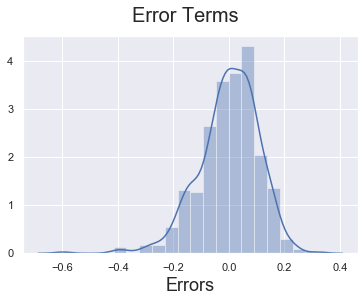

In [550]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Applying the scaling on the test sets

In [551]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [552]:
#y_test = df_test.pop('cnt')
X_test = df_test
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
184,3,0,7,1,1,0,2,0.831783,0.769660,0.657364,...,0,0,0,0,1,0,0,0,0,0
535,2,1,6,0,2,1,1,0.784017,0.755582,0.711035,...,0,0,0,1,0,0,0,0,0,0
299,4,0,10,0,4,1,2,0.511964,0.496145,0.837699,...,0,0,0,0,0,0,0,1,0,0
221,3,0,8,0,3,1,1,0.881625,0.795343,0.437098,...,0,0,0,0,0,1,0,0,0,0
152,2,0,6,0,4,1,1,0.817246,0.741471,0.314298,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,4,1,12,0,1,1,1,0.490158,0.494504,0.790897,...,0,0,0,0,0,0,0,0,0,1
127,2,0,5,0,0,0,1,0.584649,0.577380,0.650923,...,0,0,1,0,0,0,0,0,0,0
640,4,1,10,0,2,1,3,0.662528,0.608096,0.898240,...,0,0,0,0,0,0,0,1,0,0
72,1,0,3,0,1,1,1,0.331557,0.332005,0.512107,...,1,0,0,0,0,0,0,0,0,0


In [553]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
184,1.0,3,0,7,1,1,0,2,0.831783,0.769660,...,0,0,0,0,1,0,0,0,0,0
535,1.0,2,1,6,0,2,1,1,0.784017,0.755582,...,0,0,0,1,0,0,0,0,0,0
299,1.0,4,0,10,0,4,1,2,0.511964,0.496145,...,0,0,0,0,0,0,0,1,0,0
221,1.0,3,0,8,0,3,1,1,0.881625,0.795343,...,0,0,0,0,0,1,0,0,0,0
152,1.0,2,0,6,0,4,1,1,0.817246,0.741471,...,0,0,0,1,0,0,0,0,0,0


In [554]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

set_of_col = ['const','season', 'yr','windspeed', 'season_3','weathersit_3','mnth_3', 'mnth_4', 'mnth_5','mnth_8', 'mnth_9', 'mnth_10','mnth_6']
X_test_m4  = X_test_m4[set_of_col]
X_test_m4.head()

#'mnth', 'holiday', 'weekday', 'workingday','temp', 'atemp','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
      # 'weekday_5', 'weekday_6', 'season_2',  'season_4',
      # 'weathersit_2',  'mnth_2', 'mnth_7', 'mnth_11',
      # 'mnth_12'
# 

,const,season,yr,windspeed,season_3,weathersit_3,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,mnth_6
184,1.0,3,0,0.084219,1,0,0,0,0,0,0,0,0
535,1.0,2,1,0.227262,0,0,0,0,0,0,0,0,1
299,1.0,4,0,0.334206,0,0,0,0,0,0,0,1,0
221,1.0,3,0,0.339570,1,0,0,0,0,1,0,0,0
152,1.0,2,0,0.537414,0,0,0,0,0,0,0,0,1


In [555]:
# Making predictions using the fourth model

y_pred_m4 = lr_5.predict(X_test_m4)
y_pred_m4.head()

184    0.483312
535    0.598703
299    0.486211
221    0.661286
152    0.293125
dtype: float64

In [556]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.12e-149
Time:                        23:02:12   Log-Likelihood:                 410.93
No. Observations:                 511   AIC:                            -795.9
Df Residuals:                     498   BIC:                            -740.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1448      0.020      7.174      0.000       0.105       0.185
season           0.0741      0.006     13.292      0.000       0.063       0.085
yr               0.2513      0.010     25.725      0.000       0.232       0.270
windspeed       -0.1751      0.031     -5.629      0.000      -0.236      -0.114
season_3         0.1310      0.016      8.137      0.000       0.099       0.163
weathersit_3    -0.2696      0.030     -8.867      0.000      -0.329      -0.210
mnth_3           0.1221      0.018      6.624      0.000       0.086       0.158
mnth_4           0.1690      0.019      8.667      0.000       0.131       0.207
mnth_5           0.2440      0.019     13.012      0.000       0.207       0.281
mnth_6           0.2227      0.020     11.393      0.000       0.184       0.261
mnth_8           0.0699      0.022      3.225      0.001       0.027       0.113
mnth_9           0.1036      0.021      4.872      0.000       0.062       0.145
mnth_10          0.0942      0.021      4.574      0.000       0.054       0.135
==============================================================================
Omnibus:                       73.754   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.346
Skew:                          -0.806   Prob(JB):                     1.37e-33
Kurtosis:                       5.124   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [557]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.6461426343318748

### Model Evaluation

Text(0, 0.5, 'y_pred')

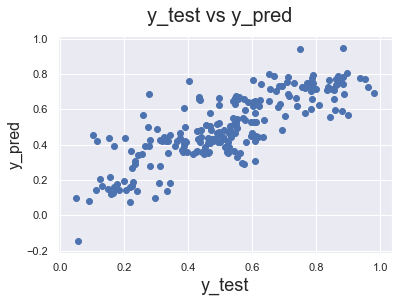

In [558]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

## Outlier Analysis
### Box plots


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

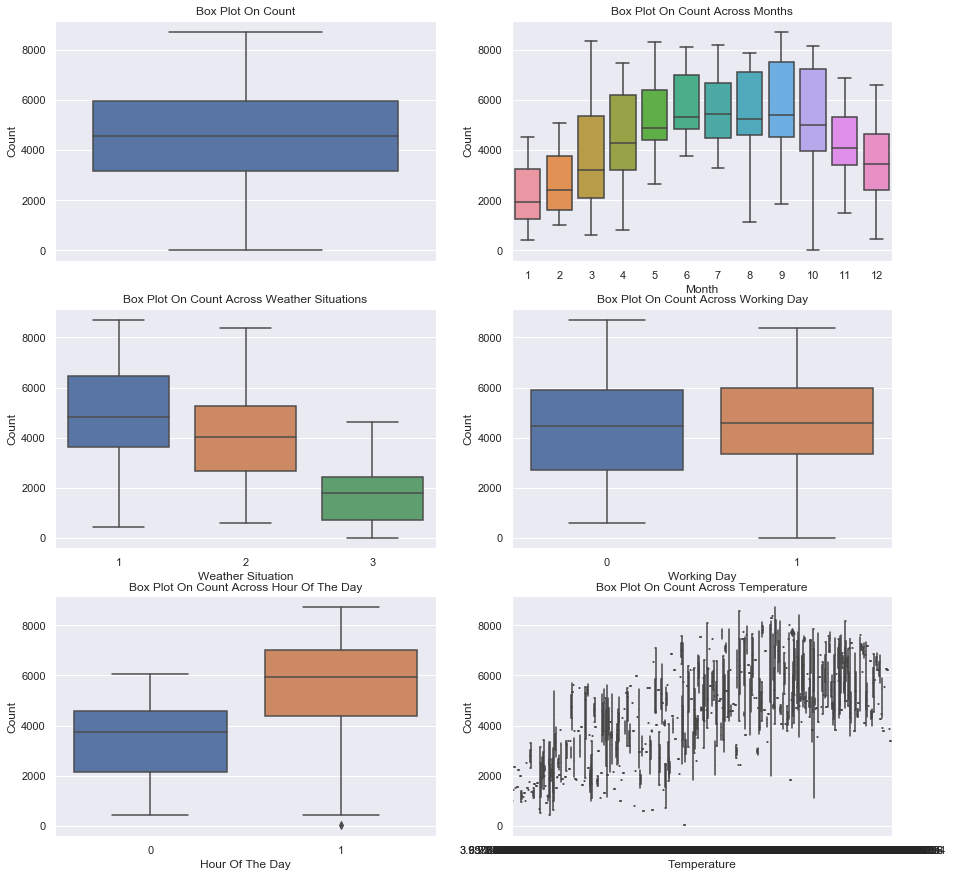

In [559]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=day,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=day,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=day,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=day,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=day,y="cnt",x="yr",orient="v",ax=axes[2][0])
sns.boxplot(data=day,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")